In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 4].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [15]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
X_train=gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [19]:
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

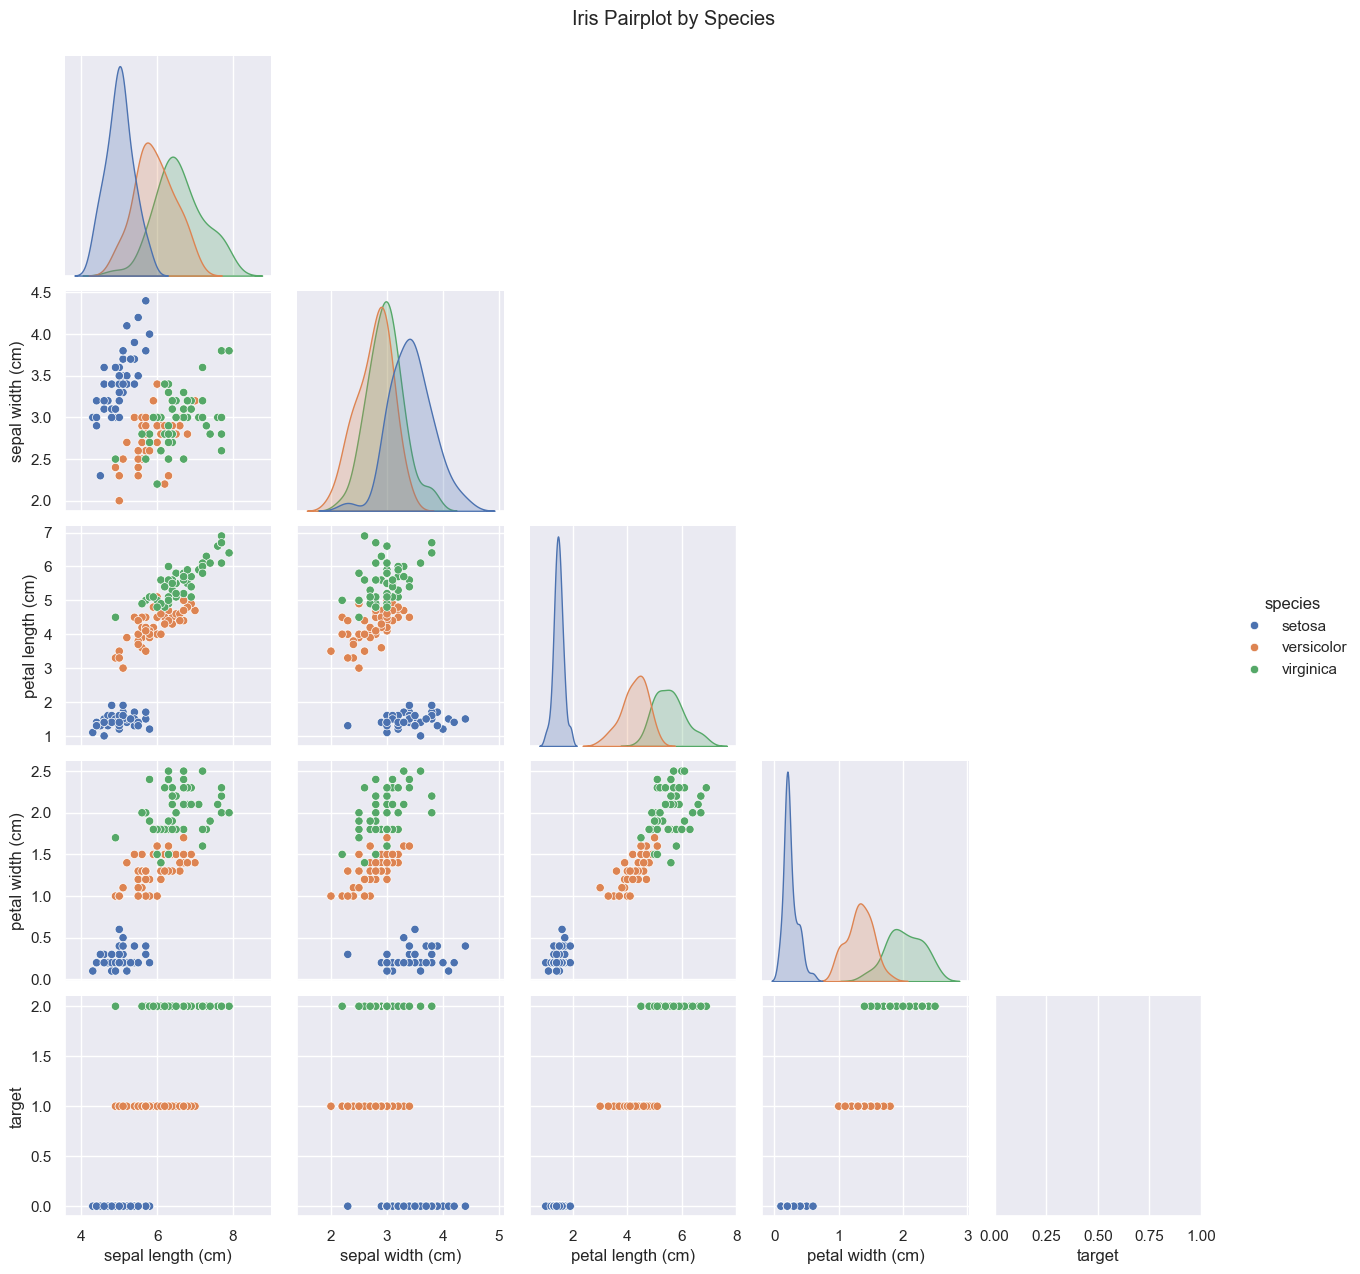

In [21]:
sns.set_theme()
pair = sns.pairplot(df, hue="species", diag_kind="kde", corner=True)
pair.fig.suptitle("Iris Pairplot by Species", y=1.02)
pair.savefig("iris_pairplot.png", dpi=300)

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="species", data=df)
ax.set_title("Iris Dataset — Class Distribution")
ax.set_xlabel("Species"); ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig("iris_dataset_preview.png", dpi=300)
plt.close()

print("Saved: iris_pairplot.png, iris_dataset_preview.png")

Saved: iris_pairplot.png, iris_dataset_preview.png
